In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.2.2+cu121


## Loading Data

In [7]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:3], y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [9]:
len(X), len(y)

(50, 50)

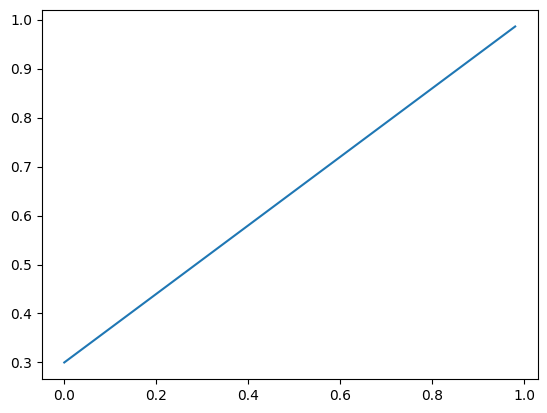

In [10]:
plt.plot(X, y)

In [11]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [14]:
class LinearReg(nn.Module):
    def __init__(self,):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                1, 
                requires_grad=True, 
                dtype=torch.float32
                )
            )
        
        self.bias = nn.Parameter(
            torch.rand(
                1,
                requires_grad=True,
                dtype=torch.float32
            )
        )
        
    def forward(self, x):
        return self.weights * x + self.bias

In [72]:
torch.manual_seed(22)

model = LinearReg()
list(model.parameters())

[Parameter containing:
 tensor([1.0302], requires_grad=True),
 Parameter containing:
 tensor([0.6577], requires_grad=True)]

In [49]:
model.state_dict()

OrderedDict([('weights', tensor([1.0302])), ('bias', tensor([0.6577]))])

In [67]:
with torch.inference_mode():
    yp = model(X_test)
yp

tensor([[1.4819],
        [1.5025],
        [1.5231],
        [1.5437],
        [1.5643],
        [1.5849],
        [1.6055],
        [1.6261],
        [1.6468],
        [1.6674]])

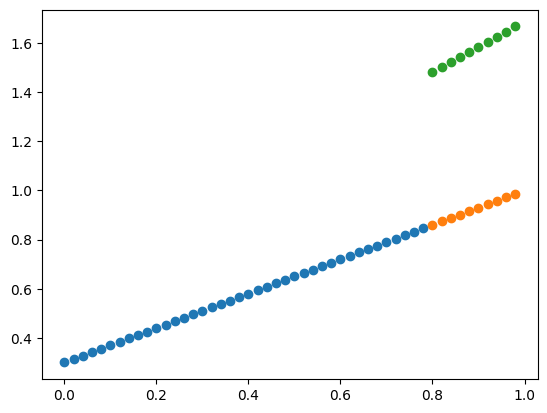

In [68]:
plt.scatter(X_train, y_train,)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yp)

In [74]:
optim = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = torch.nn.MSELoss()

In [ ]:
num_epochs = 250

for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    model.eval()
    with torch.inference_mode():
        yp_test = model(X_test)
        test_loss = loss_fn(yp_test, y_test)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{num_epochs}')
        print(f'Train Loss: {loss:0.4f}\tTest Loss: {test_loss:0.4f}\t')

Epoch 0/250
Train Loss: 0.2425	Test Loss: 0.4007	
Epoch 10/250
Train Loss: 0.1248	Test Loss: 0.1997	
Epoch 20/250
Train Loss: 0.0503	Test Loss: 0.0762	
Epoch 30/250
Train Loss: 0.0137	Test Loss: 0.0184	
Epoch 40/250
Train Loss: 0.0016	Test Loss: 0.0014	
Epoch 50/250
Train Loss: 0.0000	Test Loss: 0.0002	
Epoch 60/250
Train Loss: 0.0003	Test Loss: 0.0011	
Epoch 70/250
Train Loss: 0.0003	Test Loss: 0.0009	
Epoch 80/250
Train Loss: 0.0001	Test Loss: 0.0003	
Epoch 90/250
Train Loss: 0.0000	Test Loss: 0.0001	
Epoch 100/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 110/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 120/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 130/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 140/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 150/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 160/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 170/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 180/250
Train Loss: 0.0000	Test Loss: 0.0000	
Epoch 190/250
Train Los

In [65]:
model.eval()
with torch.inference_mode():
    yp = model(X_test)
yp

tensor([[0.8565],
        [0.8703],
        [0.8840],
        [0.8977],
        [0.9115],
        [0.9252],
        [0.9389],
        [0.9527],
        [0.9664],
        [0.9801]])

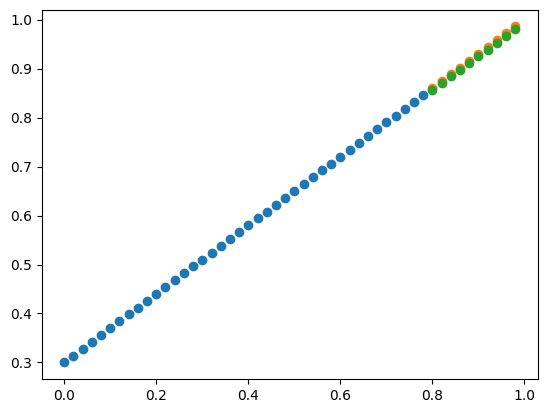

In [63]:
plt.scatter(X_train, y_train,)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yp)

In [76]:
model.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3020]))])

In [77]:
torch.save(model, 'weights.pickle')

In [78]:
model1 = torch.load('weights.pickle')

In [80]:
model1.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3020]))])

In [81]:
model2 = LinearReg()
model2.state_dict()

OrderedDict([('weights', tensor([-0.5073])), ('bias', tensor([0.1947]))])

In [83]:
model2.load_state_dict(model1.state_dict())
model2.state_dict()

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.3020]))])

In [ ]:
torch.save